In [1]:
import pandas as pd
df = pd.read_csv ('HLTREE.csv')
df.head()

,openprice,highprice,lowprice,lastprice,label
0,20.22,20.30,20.00,20.06,1
1,20.28,20.46,19.92,20.04,0
2,20.04,20.36,19.94,20.20,1
3,20.20,20.30,20.18,20.20,0
4,20.20,20.22,20.02,20.14,1


In [2]:
inputs = df.drop("label", axis="columns")

In [3]:
target = df["label"]

In [4]:
inputs

,openprice,highprice,lowprice,lastprice
0,20.22,20.30,20.00,20.06
1,20.28,20.46,19.92,20.04
2,20.04,20.36,19.94,20.20
3,20.20,20.30,20.18,20.20
4,20.20,20.22,20.02,20.14
5,20.32,20.32,20.04,20.10
6,20.06,20.10,20.04,20.08
7,20.02,20.08,19.86,20.04
8,20.16,20.16,20.00,20.04
9,20.36,20.36,19.92,20.10


In [5]:
from sklearn.preprocessing import LabelEncoder
le_op = LabelEncoder ()
le_hp = LabelEncoder ()
le_lwp =LabelEncoder () 
le_lap = LabelEncoder()

In [6]:
inputs["op_n"] = le_op.fit_transform(inputs["openprice"])
inputs["hp_n"] = le_hp.fit_transform(inputs["highprice"])
inputs["lwp_n"] = le_lwp.fit_transform(inputs["lowprice"])
inputs["lap_n"] = le_lap.fit_transform(inputs["lastprice"])

In [7]:
#here i convert the data with label encoder 
inputs.head()

,openprice,highprice,lowprice,lastprice,op_n,hp_n,lwp_n,lap_n
0,20.22,20.30,20.00,20.06,10,9,10,6
1,20.28,20.46,19.92,20.04,11,13,7,5
2,20.04,20.36,19.94,20.20,5,11,8,10
3,20.20,20.30,20.18,20.20,9,9,13,10
4,20.20,20.22,20.02,20.14,9,8,11,9


In [8]:
input_n = inputs.drop(["openprice","highprice","lowprice","lastprice"], axis = "columns")

In [43]:
input_n.head()

,op_n,hp_n,lwp_n,lap_n
0,10,9,10,6
1,11,13,7,5
2,5,11,8,10
3,9,9,13,10
4,9,8,11,9


In [107]:
from sklearn. model_selection import train_test_split

In [108]:
X_train, X_test,Y_train,Y_test = train_test_split (input_n,target,test_size = 0.2)

In [109]:
X_test

,op_n,hp_n,lwp_n,lap_n
4,9,8,11,9
18,1,0,3,1
1,11,13,7,5
13,3,12,8,7
8,8,7,10,5


In [110]:
X_train

,op_n,hp_n,lwp_n,lap_n
19,2,6,1,7
14,7,5,9,5
11,2,1,8,3
5,12,10,12,8
3,9,9,13,10
12,3,1,0,0
7,4,4,4,5
16,5,4,9,4
20,0,14,2,2
0,10,9,10,6


In [111]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from graphviz import Source   
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from ipywidgets import interactive

In [112]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)

In [113]:
clf = clf.fit(X_train,Y_train)

In [114]:
y_pred = clf.predict(X_test)

In [115]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.8


In [116]:
feature_cols =['openprice','highprice','lowprice','lastprice']

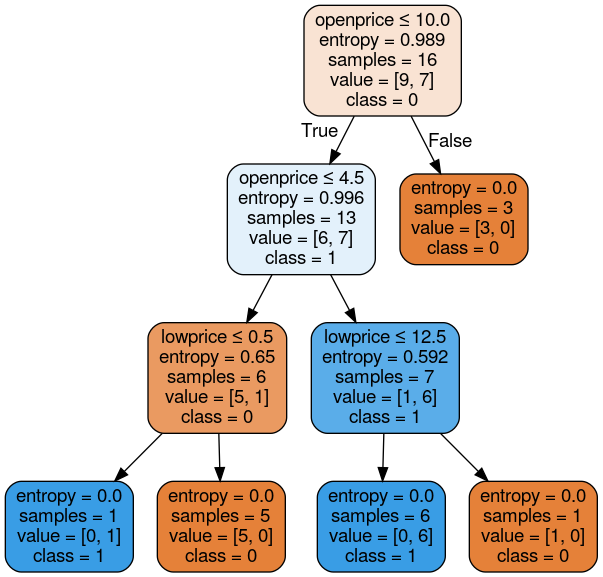

In [106]:
#this to show the decision tree and convert to png.. until command graph its still work.. 
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('HLTREE1.png')
Image(graph.create_png())